## STAT 440 Final Project: Personal Key Indicators of Heart Disease 


In [1]:
#1 Read the data
import pandas as pd
import numpy as np
data = pd.read_csv("/content/heart_2020_cleaned.csv")
data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes,No
1,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No,No
2,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No,No
3,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes,No
4,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No,No


### Inspecting the data


In [2]:
# Summary stat
print(data.describe())
print(data.info())

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float64
 1   Smoking           319795 non-null  object 
 2   AlcoholDrinking   319795 non-null  object 
 3   Stroke            319795 non-null  object

There is imbalance dataset. The ratio that No:Yes = 10.68. Therefore we need to solve data imbalance

In [3]:
print(data.isnull().values.any())


False


HeartDisease
0               292422
1                27373
dtype: int64


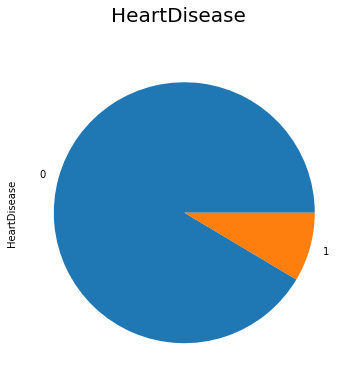

In [34]:
import matplotlib.pyplot as plt
plt.suptitle('HeartDisease', fontsize=20)
data['HeartDisease'].value_counts().plot.pie(figsize=(6,6))

print(data[["HeartDisease"]].value_counts())

In [5]:
data["HeartDisease"] = data["HeartDisease"].replace(list(data["HeartDisease"].unique()),[0,1])

In [ ]:
print(data["HeartDisease"])

In [7]:
print(data.iloc[:,:-1])

          BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth  \
0       16.60     Yes              No     No               3            30   
1       20.34      No              No    Yes               0             0   
2       26.58     Yes              No     No              20            30   
3       24.21      No              No     No               0             0   
4       23.71      No              No     No              28             0   
...       ...     ...             ...    ...             ...           ...   
319790  27.41     Yes              No     No               7             0   
319791  29.84     Yes              No     No               0             0   
319792  24.24      No              No     No               0             0   
319793  32.81      No              No     No               0             0   
319794  46.56      No              No     No               0             0   

       DiffWalking     Sex  AgeCategory      Race Diabetic Phys

Preprocessing  the data

In [ ]:
data.iloc[:,[-1]]

In [35]:
# Convert the categorical features
data_dummies_pre = pd.get_dummies(data.iloc[:,:-1])

data_dummies = pd.concat([data_dummies_pre, data.iloc[:,[-1]]], axis = 1)


print(data_dummies.head(5))


     BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking_No  Smoking_Yes  \
0  16.60               3            30          5           0            1   
1  20.34               0             0          7           1            0   
2  26.58              20            30          8           0            1   
3  24.21               0             0          6           1            0   
4  23.71              28             0          8           1            0   

   AlcoholDrinking_No  AlcoholDrinking_Yes  Stroke_No  Stroke_Yes  ...  \
0                   1                    0          1           0  ...   
1                   1                    0          0           1  ...   
2                   1                    0          1           0  ...   
3                   1                    0          1           0  ...   
4                   1                    0          1           0  ...   

   GenHealth_Good  GenHealth_Poor  GenHealth_Very good  Asthma_No  Asthma_Yes  \
0    

Oversample the data to make it more balanced

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_smo, y_smo = sm.fit_resample(data_dummies_pre, data.iloc[:,[-1]])


In [ ]:
data_dummies = pd.concat([X_smo, y_smo], axis = 1)
print(data_dummies)

In [38]:
print(data_dummies[["HeartDisease"]].value_counts())

HeartDisease
0               292422
1               292422
dtype: int64


In [12]:
# Spilitting the dataset into train and test sets
# Import train_test_split
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_dummies, test_size=0.3, random_state=42)


In [13]:
#X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [14]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Segregate features and labels into separate variables
#X_train, y_train = data_train.iloc[:,:-1].values, data_train.iloc[:,[-1]].values
#X_test, y_test = data_test.iloc[:,:-1].values, data_test.iloc[:,[-1]].values
y_train=data_train.iloc[:,[-1]].values
y_test=data_test.iloc[:,[-1]].values  #value
X_train=data_train.drop(["HeartDisease"],axis=1) #dataframe
X_test=data_test.drop(["HeartDisease"],axis=1)


In [ ]:
# Check the correlation for each columns
corr_data_train = data_train.corr()
corr_data_train.style.background_gradient()

In [ ]:
# check
print(data_train)

#### PCA
we can instead use a common approach to reduce the number of features called principal component analysis (PCA).It is possible that the variance between genres can be explained by just a few features in the dataset. PCA rotates the data along the axis of highest variance, thus allowing us to determine the relative contribution of each feature of our data towards the variance between classes.

However, since PCA uses the absolute variance of a feature to rotate the data, a feature with a broader range of values will overpower and bias the algorithm relative to the other features. To avoid this, we must first normalize our train and test features. There are a few methods to do this, but a common way is through standardization, such that all features have a mean = 0 and standard deviation = 1 (the resultant is a z-score).

In [16]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale train_features and set the values to a new variable
scaler = StandardScaler()

# Scale train_features and test_features
scaled_train_features = scaler.fit_transform(X_train)
scaled_test_features = scaler.transform(X_test)
print(len(X_train))
print(len(y_train))

409390
409390


Text(0.5, 0, 'Principal Component #')

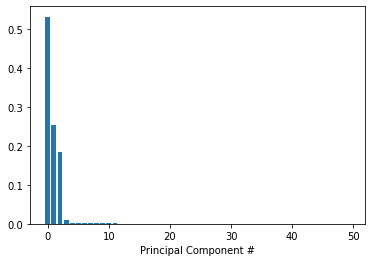

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#PCA using all features
pca = PCA()
pca.fit(X_train)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

Further visualization of PCA

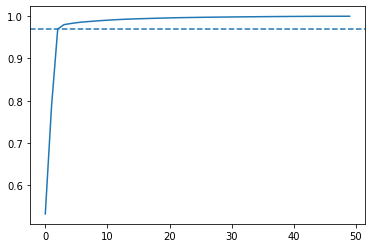

In [42]:
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.97.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.97, linestyle='--')

In [46]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components=4, random_state=10)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)

In [26]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create our decision tree
tree = DecisionTreeClassifier(random_state=10)

# Train our decision tree
tree.fit(train_pca, y_train)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)


In [21]:
print(len(pred_labels_tree))

175454


In [44]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logisitic regression
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca, y_train)
pred_labels_logit = logreg.predict(test_pca)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(y_test, pred_labels_tree)
class_rep_log = classification_report(y_test, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.82     87576
           1       0.84      0.79      0.81     87878

    accuracy                           0.82    175454
   macro avg       0.82      0.82      0.82    175454
weighted avg       0.82      0.82      0.82    175454

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.73      0.76      0.75     87576
           1       0.75      0.72      0.74     87878

    accuracy                           0.74    175454
   macro avg       0.74      0.74      0.74    175454
weighted avg       0.74      0.74      0.74    175454



MultinomialNB

In [ ]:
print(train_pca)

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
MultiNB = MultinomialNB()
#To avoid negative
mms = MinMaxScaler().fit(train_pca)
train_pca_nb = mms.transform(train_pca)
test_pca_nb = mms.transform(test_pca)



MultiNB.fit(train_pca_nb, y_train)
pred_labels_MultiNB = logreg.predict(test_pca_nb)

class_rep_nb = classification_report(y_test, pred_labels_MultiNB)

print("MultinomialNB: \n", class_rep_nb)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB: 
               precision    recall  f1-score   support

           0       0.57      0.95      0.71     87576
           1       0.84      0.28      0.42     87878

    accuracy                           0.61    175454
   macro avg       0.70      0.61      0.56    175454
weighted avg       0.70      0.61      0.56    175454



The best model is decision tree: we apply cross-validation to increase the f1-score

In [29]:
from sklearn.model_selection import cross_val_score
d_scores = cross_val_score(tree,train_pca, y_train,cv=5)
d_scores

array([0.86747356, 0.86713159, 0.86736364, 0.86710716, 0.86597132])